## Introduction to Indexing

https://www.youtube.com/watch?v=5NFKsA1FMO8

To provide durability, a relational database has to store data on disk. The only other storage option on a computer is RAM, and while RAM is orders of magnitude faster than disk, it's volatile and much more expensive.

Since disk access is slow but necessary, a database system might come to a crawl when faced with both large amounts of data and a large volume of requests coming in at the same time. In this lesson, we'll look at how indexing can alleviate this.

## Developing Your Intuition About Indexing

### Indexing: Developing Your Intuition

https://www.youtube.com/watch?v=BBTqyu7zh9M

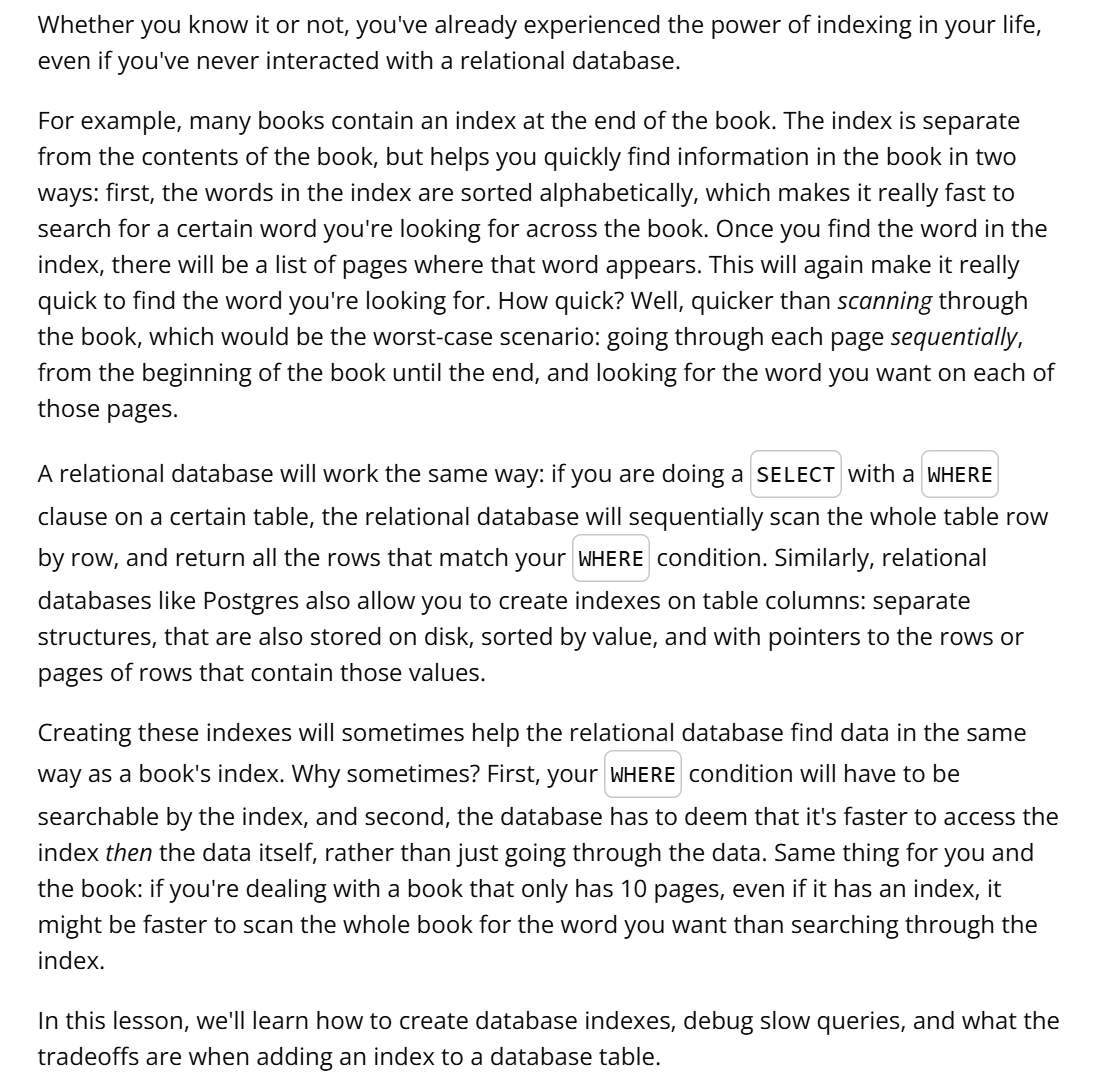

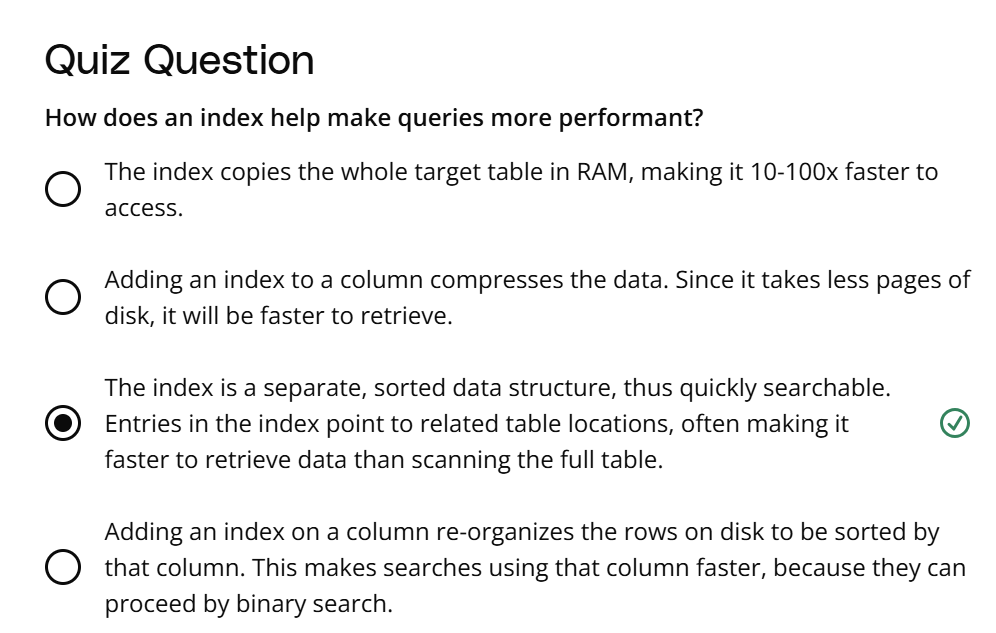

## Creating an Index

https://www.youtube.com/watch?v=97RjjTYbPXQ

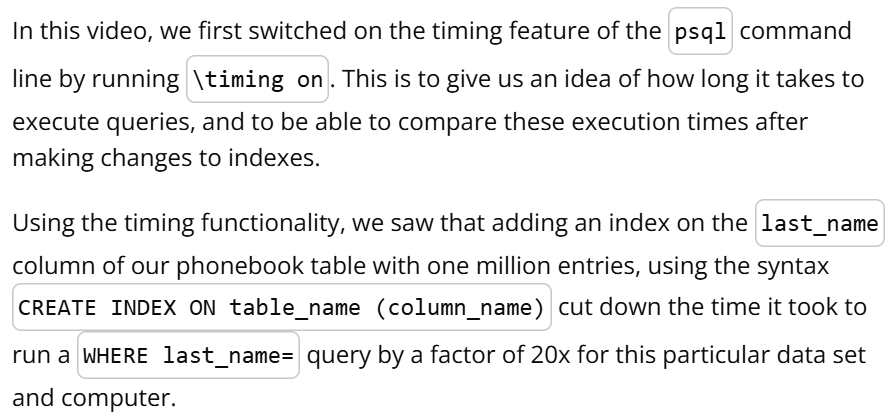

https://www.youtube.com/watch?v=3IW_00azJnc

When creating an index with a specified name, the syntax commonly follows this format:

CREATE INDEX index_name
ON table_name (column_name);

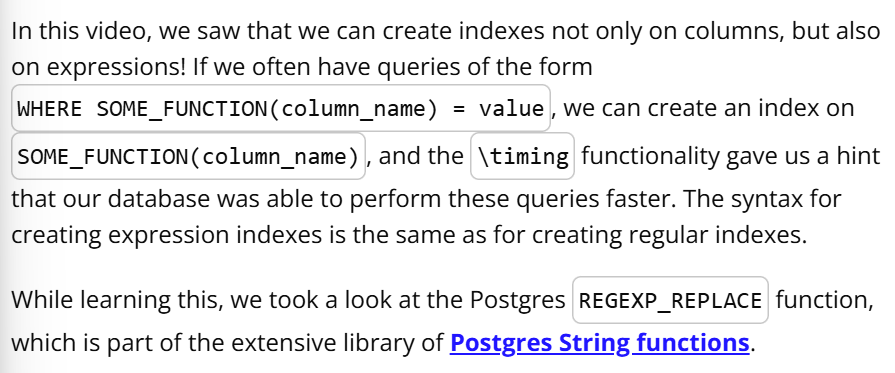

https://www.postgresql.org/docs/9.6/functions-string.html

https://www.youtube.com/watch?v=tINSXBa6zvs

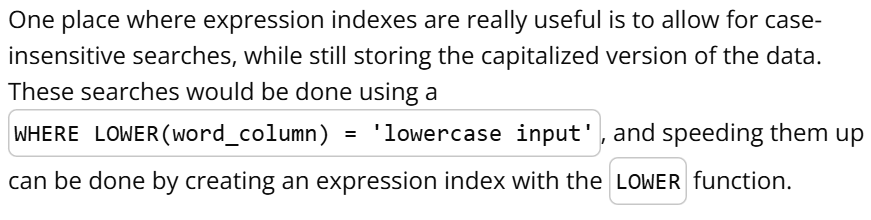

https://www.youtube.com/watch?v=wlMQ_SNIU0Q

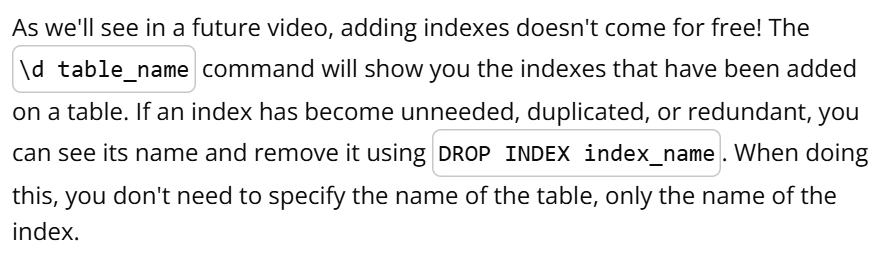

https://www.youtube.com/watch?v=f3oQrtecLj4

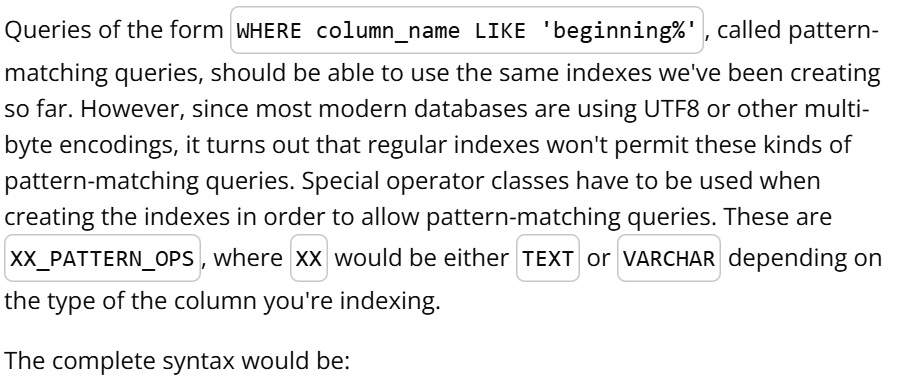

In [ ]:
CREATE INDEX ON table_name (column_to_partially_match XX_PATTERN_OPS);

taking care to use TEXT or VARCHAR appropriately in place of XX.

Follow this link for the full[Postgres `CREATE INDEX` documentation](https://www.postgresql.org/docs/9.6/sql-createindex.html), keeping in mind that we'll be looking at more parts of this syntax in future videos.

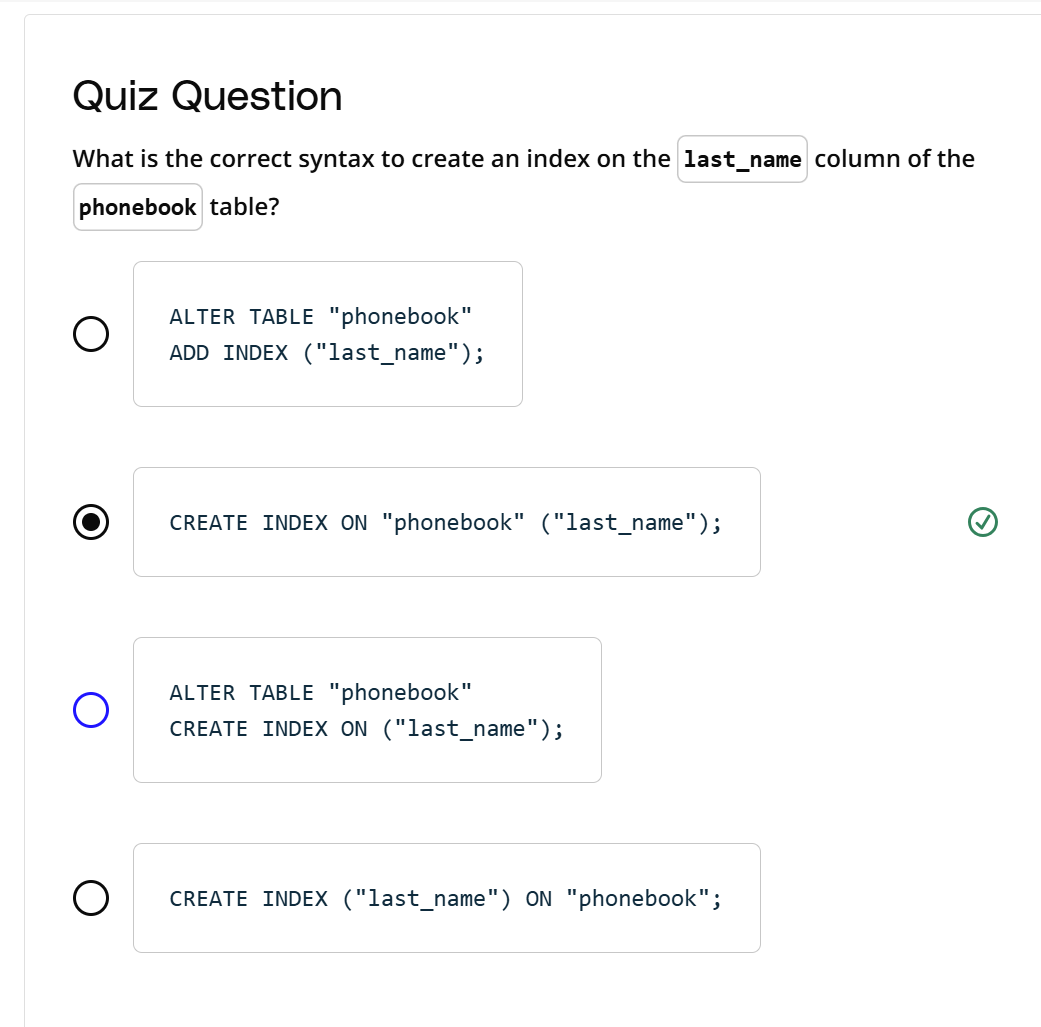

## Multi-Column Indexes

https://www.youtube.com/watch?v=6PLe6jB7FJs

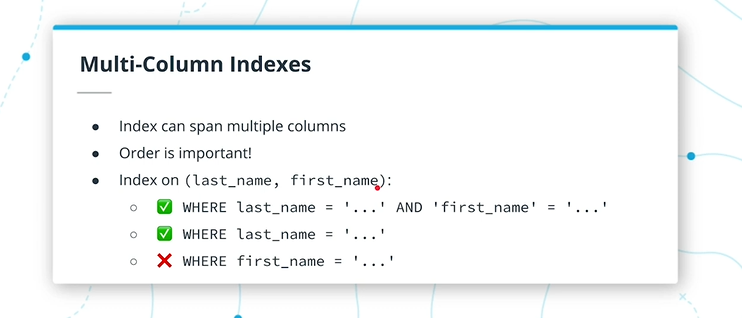

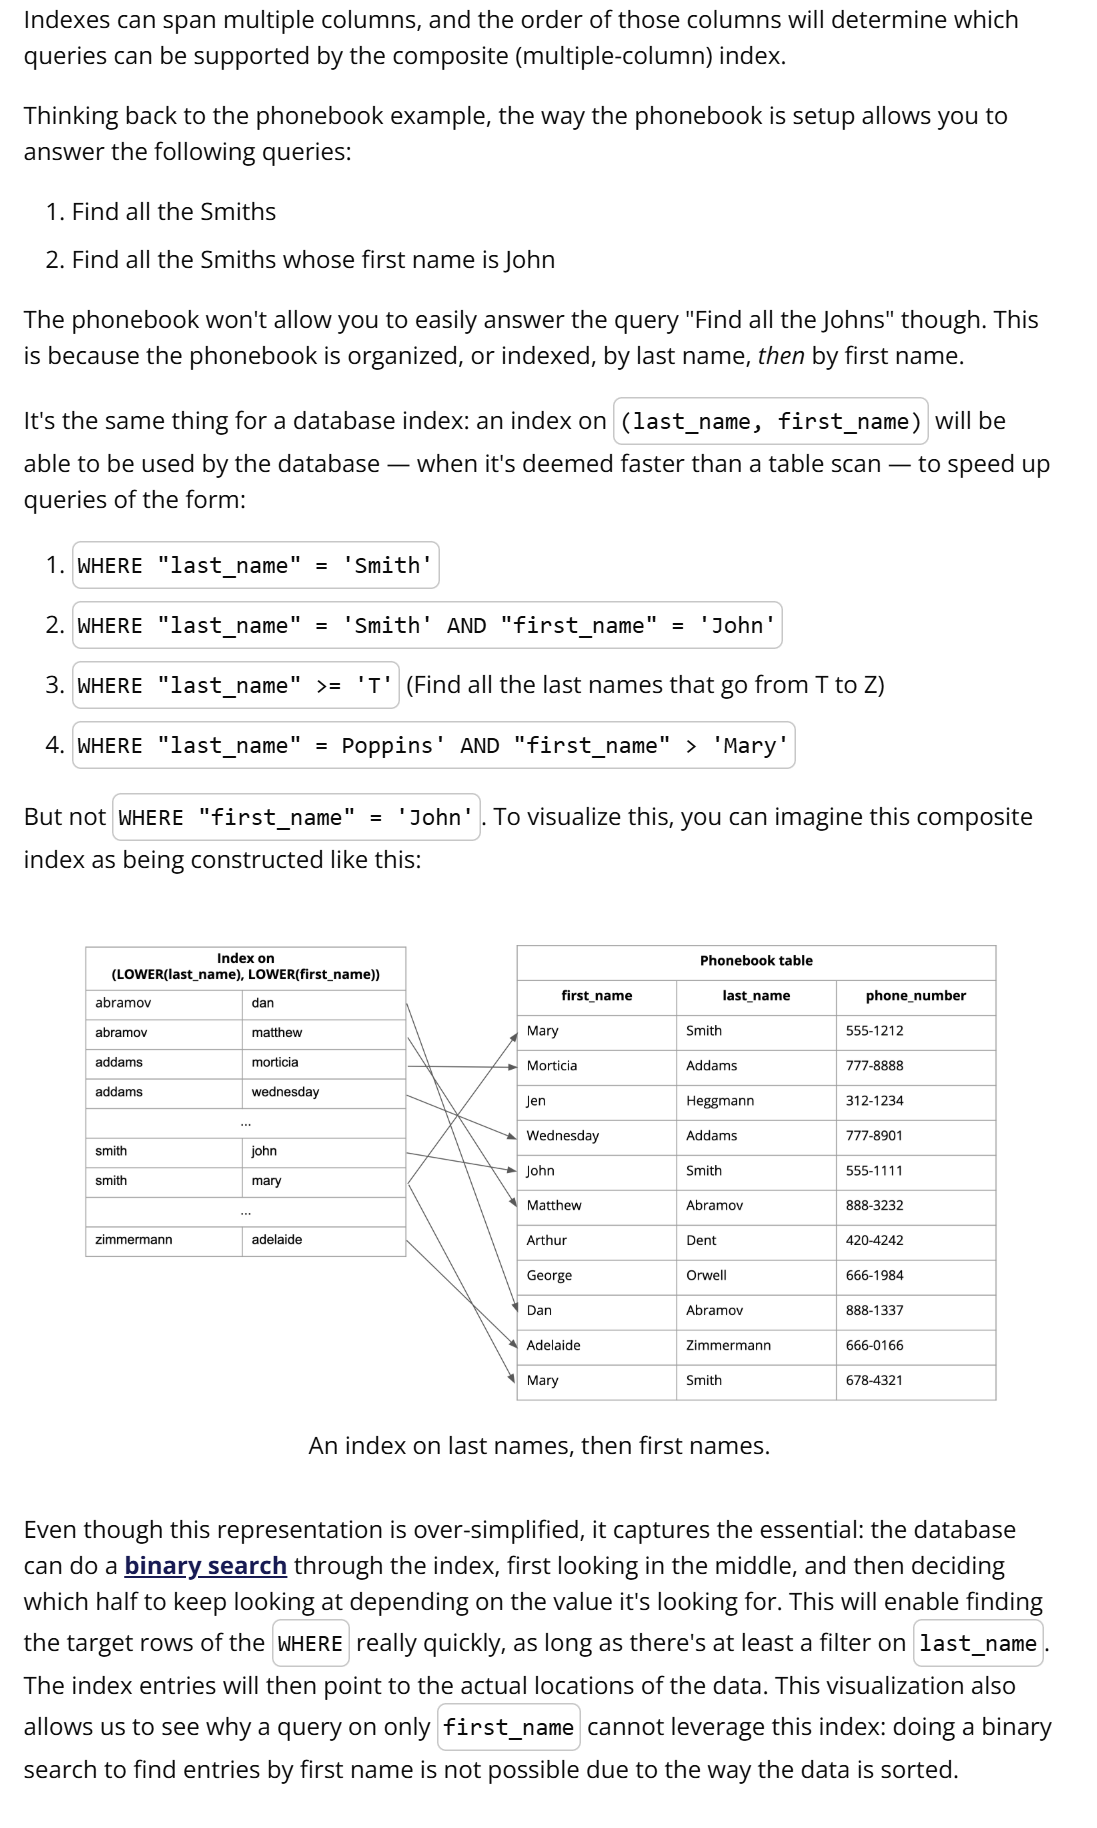

https://en.wikipedia.org/wiki/Binary_search_algorithm

## Multi-Column Indexes Quizzes

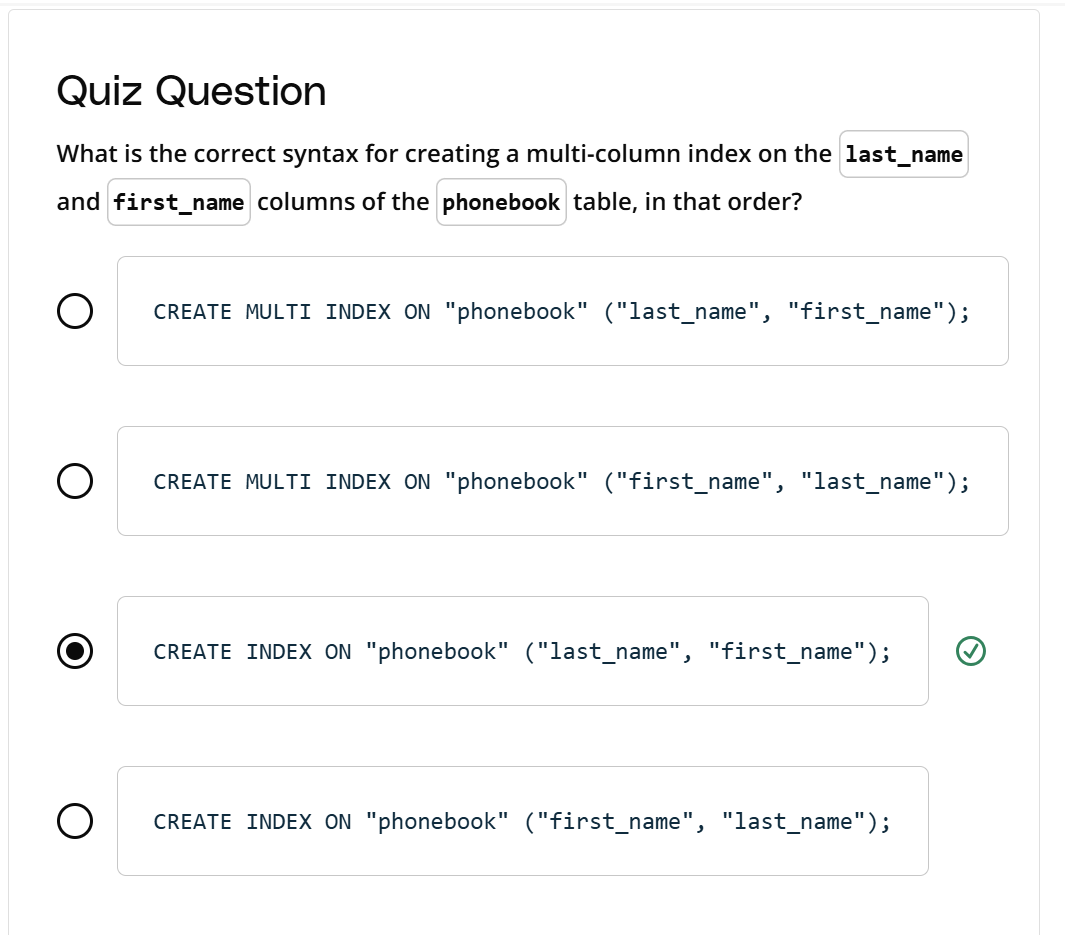

## Unique Indexes

https://www.youtube.com/watch?v=4l8egAAlwKA

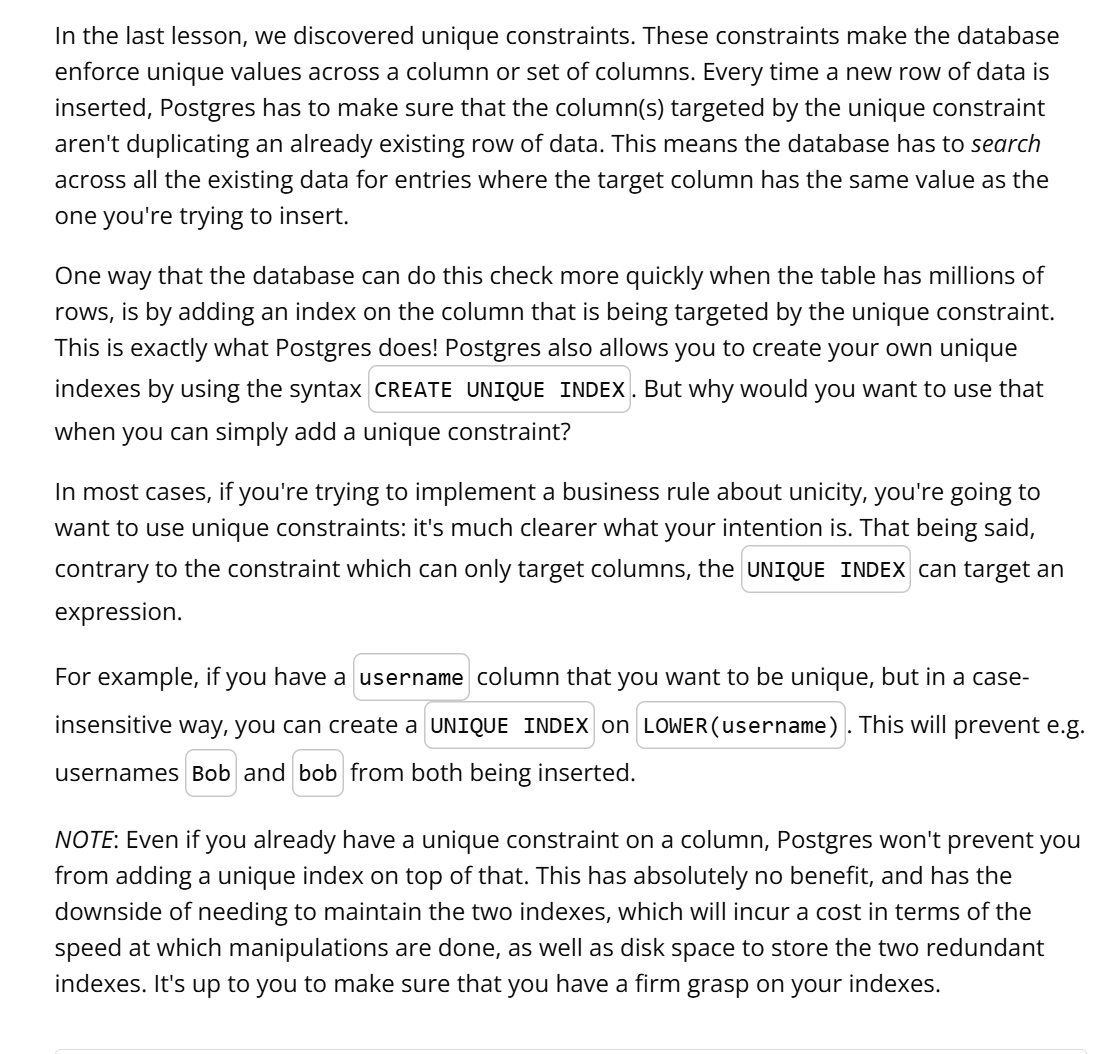

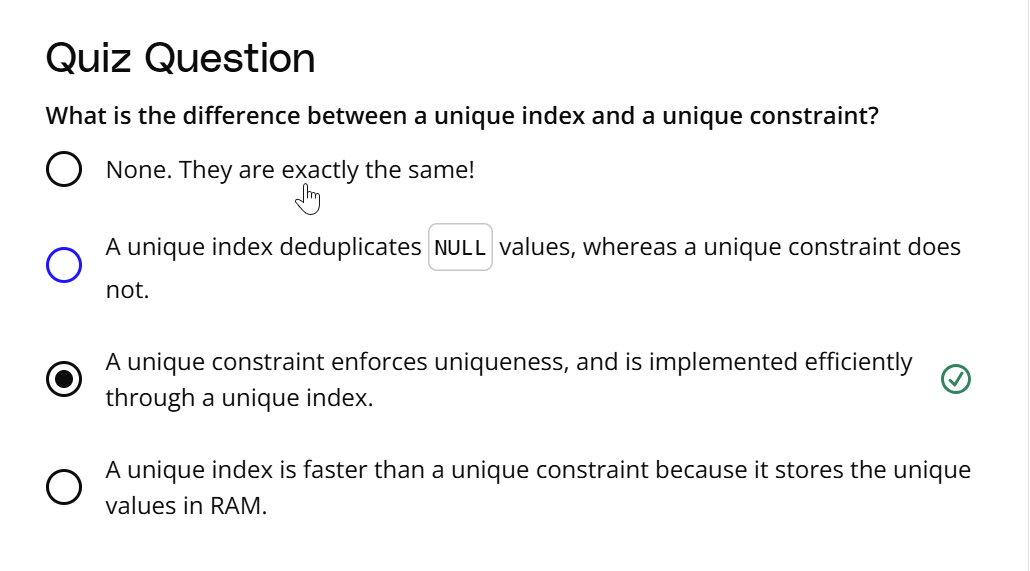

## Exercise: Indexing

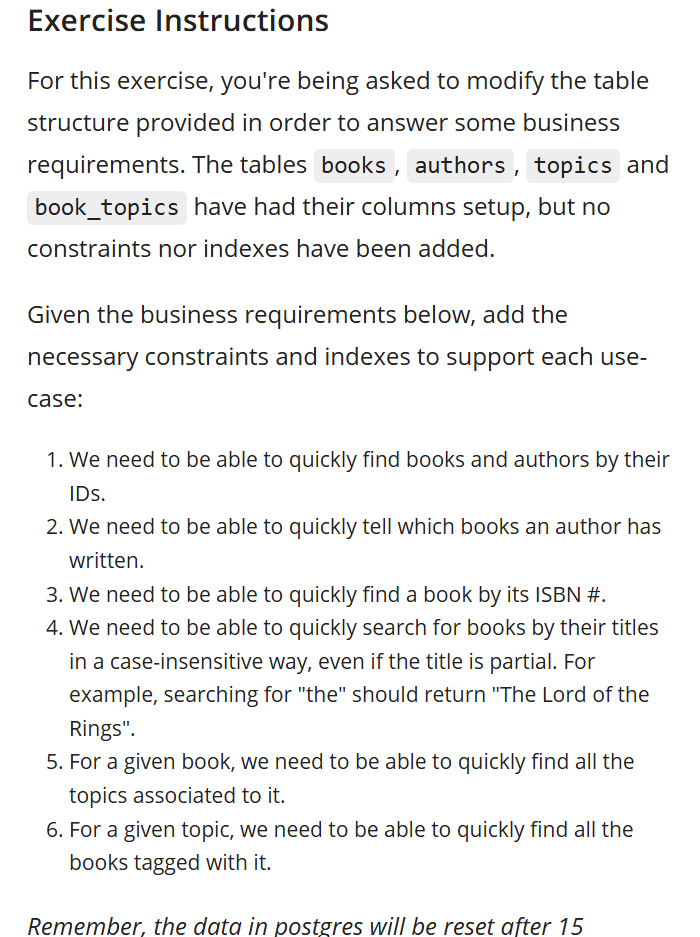

In [ ]:
-- Alter the books table to add constraints
ALTER TABLE books
ADD CONSTRAINT "book_pk" PRIMARY KEY ("id"),
ADD CONSTRAINT "unique_isbn" UNIQUE ("isbn"),
ADD CONSTRAINT "book_fk" FOREIGN KEY ("author_id") REFERENCES authors ("id");

-- Create an index on the author_id column in the books table
CREATE INDEX ON books ("author_id");
CREATE INDEX ON books (LOWER("title") VARCHAR_PATTERN_OPS);

-- Alter the authors table to add a primary key constraint
ALTER TABLE authors
ADD CONSTRAINT "author_pk" PRIMARY KEY ("id");

ALTER TABLE topics
ADD CONSTRAINT "topic_pk" PRIMARY kEY ("id"),
ADD UNIQUE("name")
ALTER COLUMN "name" SET NOT NULL

ALTER TABLE book_topics
ADD CONSTRAINT "book_topic_pk" PRIMARY KEY ("book_id", "topic_id"),
ADD CONSTRAINT "book_topic_fk" FOREIGN KEY("topic_id") REFERENCES "topics",
ADD CONSTRAINT "book_topic_fk" FOREIGN KEY("book_id") REFERENCES "books"

CREATE INDEX ON "books_topics" ("topic_id")


## Solution: Indexing Exercise

### Indexing Exercise Solution

https://www.youtube.com/watch?v=nNOG0eGxi98

Don't forget to use constraints to your advantage! Specifically, `NOT NULL` is a constraint that you'll use in many places whenever there's no valid reason for a value to be absent. In this exercise solution, we only added that constraint on the topic's name, but we can also add it on the `isbn` column, for example: doing so would encode a real business need, specifically that we don't want to accept any book in this database if it doesn't have an ISBN number.

https://www.youtube.com/watch?v=Pk4iqX3YYt0

Remember that unique and primary key constraints create an index under the hood to implement the constraint efficiently. If you have queries with a WHERE that targets these columns, and you need these queries to perform well, you shouldn't add the index manually - otherwise, you'll be duplicating the resources required to maintain that index.

https://www.youtube.com/watch?v=DVJOKU1wD8U

Here is the full solution to the exercise:

In [ ]:
-- Constraints
ALTER TABLE "authors"
  ADD PRIMARY KEY ("id");

ALTER TABLE "topics"
  ADD PRIMARY KEY("id"),
  ADD UNIQUE ("name"),
  ALTER COLUMN "name" SET NOT NULL;

ALTER TABLE "books"
  ADD PRIMARY KEY ("id"),
  ADD UNIQUE ("isbn"),
  ADD FOREIGN KEY ("author_id") REFERENCES "authors" ("id");

ALTER TABLE "book_topics"
  ADD PRIMARY KEY ("book_id", "topic_id");
-- or ("topic_id", "book_id") instead...?

-- We need to be able to quickly find books and authors by their IDs.
-- Already taken care of by primary keys

-- We need to be able to quickly tell which books an author has written.
CREATE INDEX "find_books_by_author" ON "books" ("author_id");

-- We need to be able to quickly find a book by its ISBN #.
-- The unique constraint on ISBN already takes care of that 
--   by adding a unique index

-- We need to be able to quickly search for books by their titles
--   in a case-insensitive way, even if the title is partial. For example, 
--   searching for "the" should return "The Lord of the rings".
CREATE INDEX "find_books_by_partial_title" ON "books" (
  LOWER("title") VARCHAR_PATTERN_OPS
);

-- For a given book, we need to be able to quickly find all the topics 
--   associated with it.
-- The primary key on the book_topics table already takes care of that 
--   since there's an underlying unique index

-- For a given topic, we need to be able to quickly find all the books 
--   tagged with it.
CREATE INDEX "find_books_by_topic" ON "book_topics" ("topic_id");

## Verifying Index Usage with EXPLAIN: Part I

### Verifying Index Usage with EXPLAIN: Part I

https://www.youtube.com/watch?v=5eytvcShVlU

The Postgres command line's timing feature is a poor debugging tool. At best, it can tell you that one of your queries is slow. But why is it slow? Postgres' `EXPLAIN` command can give you all that information.

Adding `EXPLAIN` to the beginning of a query -- most often a `SELECT` query -- will not execute the query. Instead, it will show you the *query plan*, i.e. what Postgres would do if you were to execute that query.

https://www.youtube.com/watch?v=Ri12j2dkPJ4

The first thing that `EXPLAIN` showed us is that when a table has no indexes and we execute a query on it, Postgres executes a *sequential scan* of the table to return the results: much like searching the phonebook for "John", Postgres goes through every row of data, filters it against any `WHERE` condition in the query, and adds it to the returned data set.

https://www.youtube.com/watch?v=nx6609TUFdM

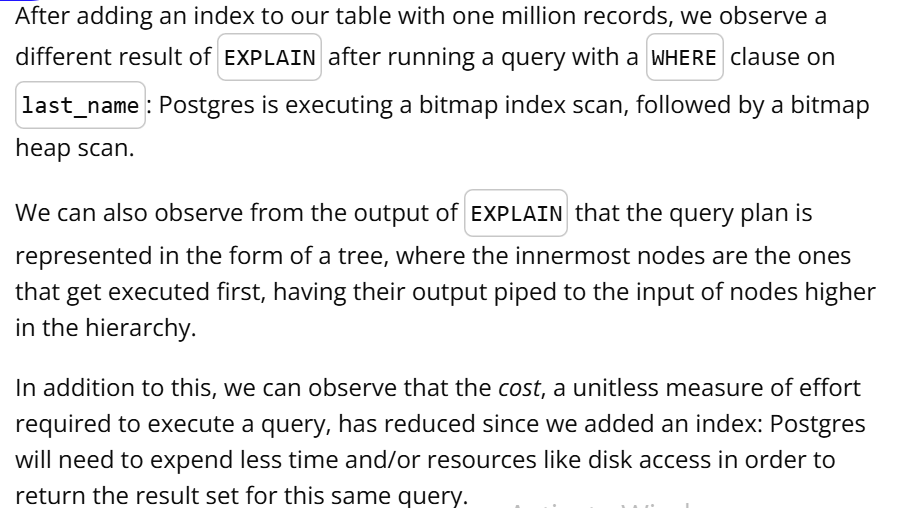

https://www.youtube.com/watch?v=BQotQKPxyv8

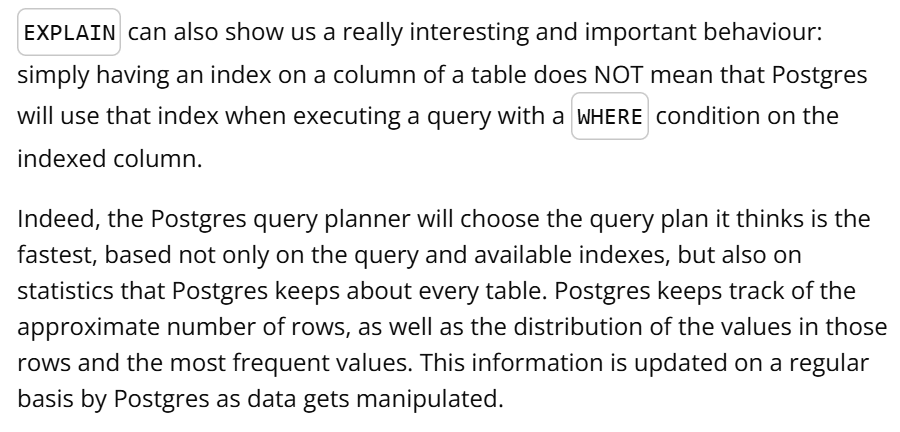

## Verifying Index Usage with EXPLAIN: Part II

https://www.youtube.com/watch?v=EYFqOnU7stw

Postgres' query planner is really smart: given the same query, table structure, and quantity of data, the planner might choose different query plans depending on the distribution of the data. It does this by keeping track of statistics about the data in all tables — such as which values are the most frequent — and updating those statistics when the data gets manipulated. The `ANALYZE` command can be used to force Postgres to update its statistics about a table.

https://www.youtube.com/watch?v=OQX45H47Bbk

Learning to read the output of explain can give you a tremendous amount of information about what is happening under the hood. In this example, we saw that some query plan nodes can run in parallel, something that was made visible by the fact that the startup cost was 0 for both. These two nodes were also at the same level of the query plan's tree representation, as well as the most indented, giving us a further hint that they were to run first and together.

https://www.youtube.com/watch?v=4hdydJU5Qa8

Since an index is ordered by the column(s) that it's indexing, having an `ORDER BY` clause on the column(s) of an index will be free if Postgres decides to use that index for the query. This is because the index will be scanned in the order that we want the data returned, so when the rows are fetched by the database, they will immediately be in the correct order.

Adding a limit to a query might change the behavior of the query planner. Because a limit may cut off the row fetching process earlier than is needed to return the full data set, a different strategy might be more appropriate.

Follow this link for the full [Postgres `EXPLAIN` documentation](https://www.postgresql.org/docs/9.6/sql-explain.html).

## Using EXPLAIN ANALYZE

https://www.youtube.com/watch?v=yD1V1b2ZHz0

When looking at the `EXPLAIN` command in the last videos, we saw that executing it did not execute the query that was being explained. A consequence of this is that all the cost values and numbers of rows are only estimates. Sometimes, it's important to have access to actual measurements about the execution of a query: if they're too far off from the estimates, it might mean that Postgres isn't picking the best query plan for a particular query. That could be because of outdated statistics, or other reasons that would have to be discovered on a case by case basis.

If `EXPLAIN` isn't giving you the information you need, then `EXPLAIN ANALYZE` might.

https://www.youtube.com/watch?v=S-Q9EaWLz4s

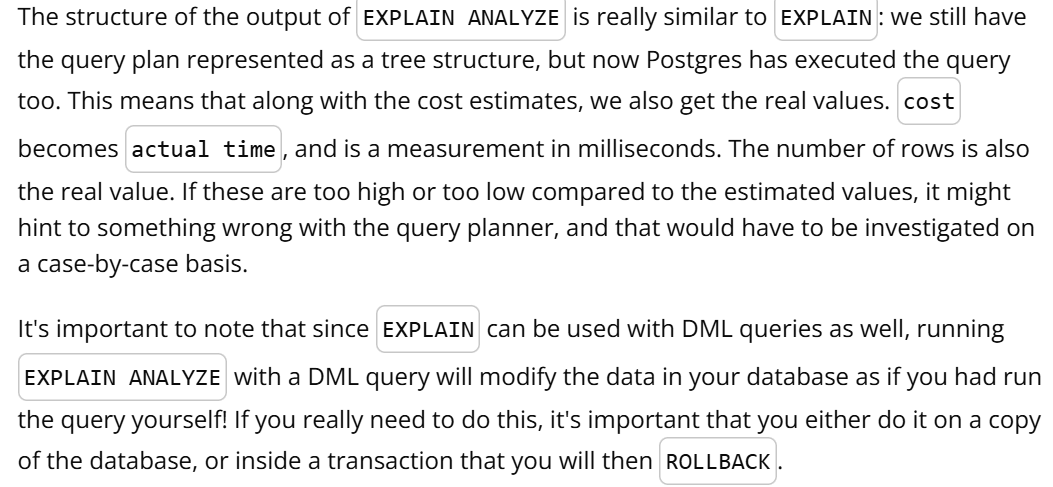

The [Postgres `EXPLAIN` documentation](https://www.postgresql.org/docs/9.6/sql-explain.html) also documents the usage of the `ANALYZE` modifier.

## Verifying Index Usage with EXPLAIN Quizzes

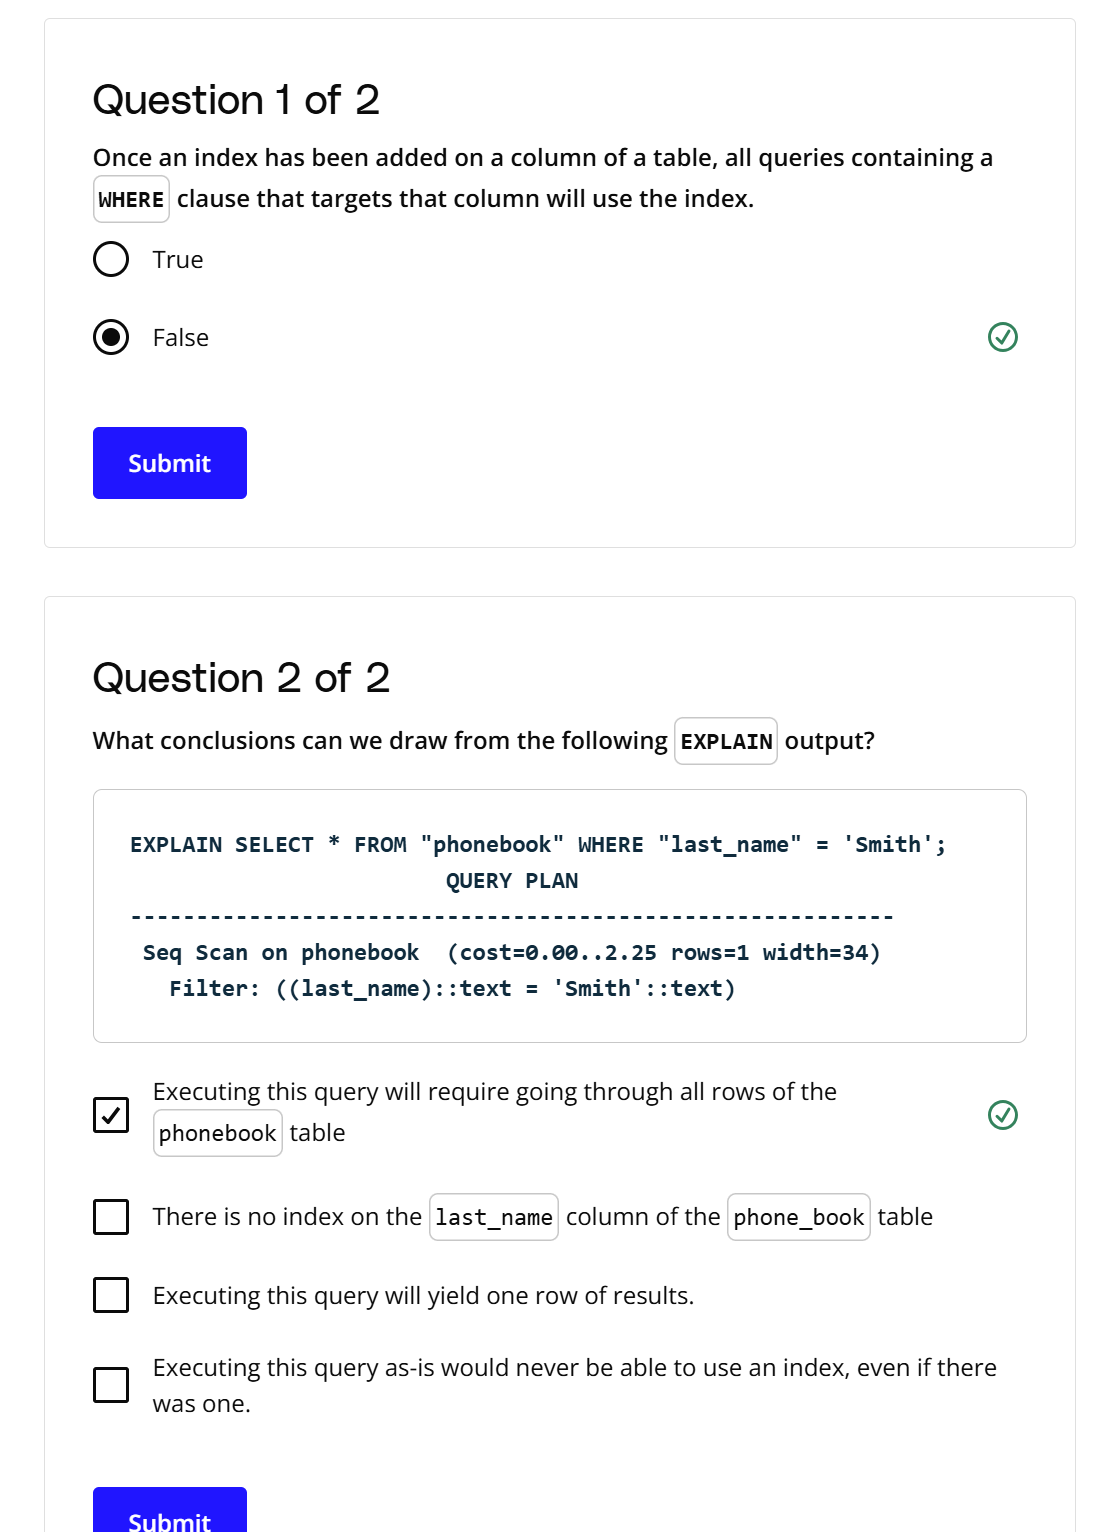

https://www.youtube.com/watch?v=NzmL_HRjdHk

Even though a query plan shows a sequential scan, this only means that with the current statistics on the data, the best plan is to scan every row of the table. It does NOT mean that there is no index that targets the columns you are filtering on in the query. Postgres could choose to ignore the index if it thinks that accessing both it and the data will be longer than going through the whole table.

https://www.youtube.com/watch?v=YzsoASl7NeU

As you start using `EXPLAIN` and `EXPLAIN ANALYZE`, you might get fixated on the question "is Postgres using my index?", but in the vast majority of cases, this question is completely irrelevant: the important thing isn't whether Postgres is using an index or not, it's whether Postgres is choosing the fastest possible query plan. In most cases, the answer will be yes. In some cases where a query is slow, adding an index might be the answer to making it faster.

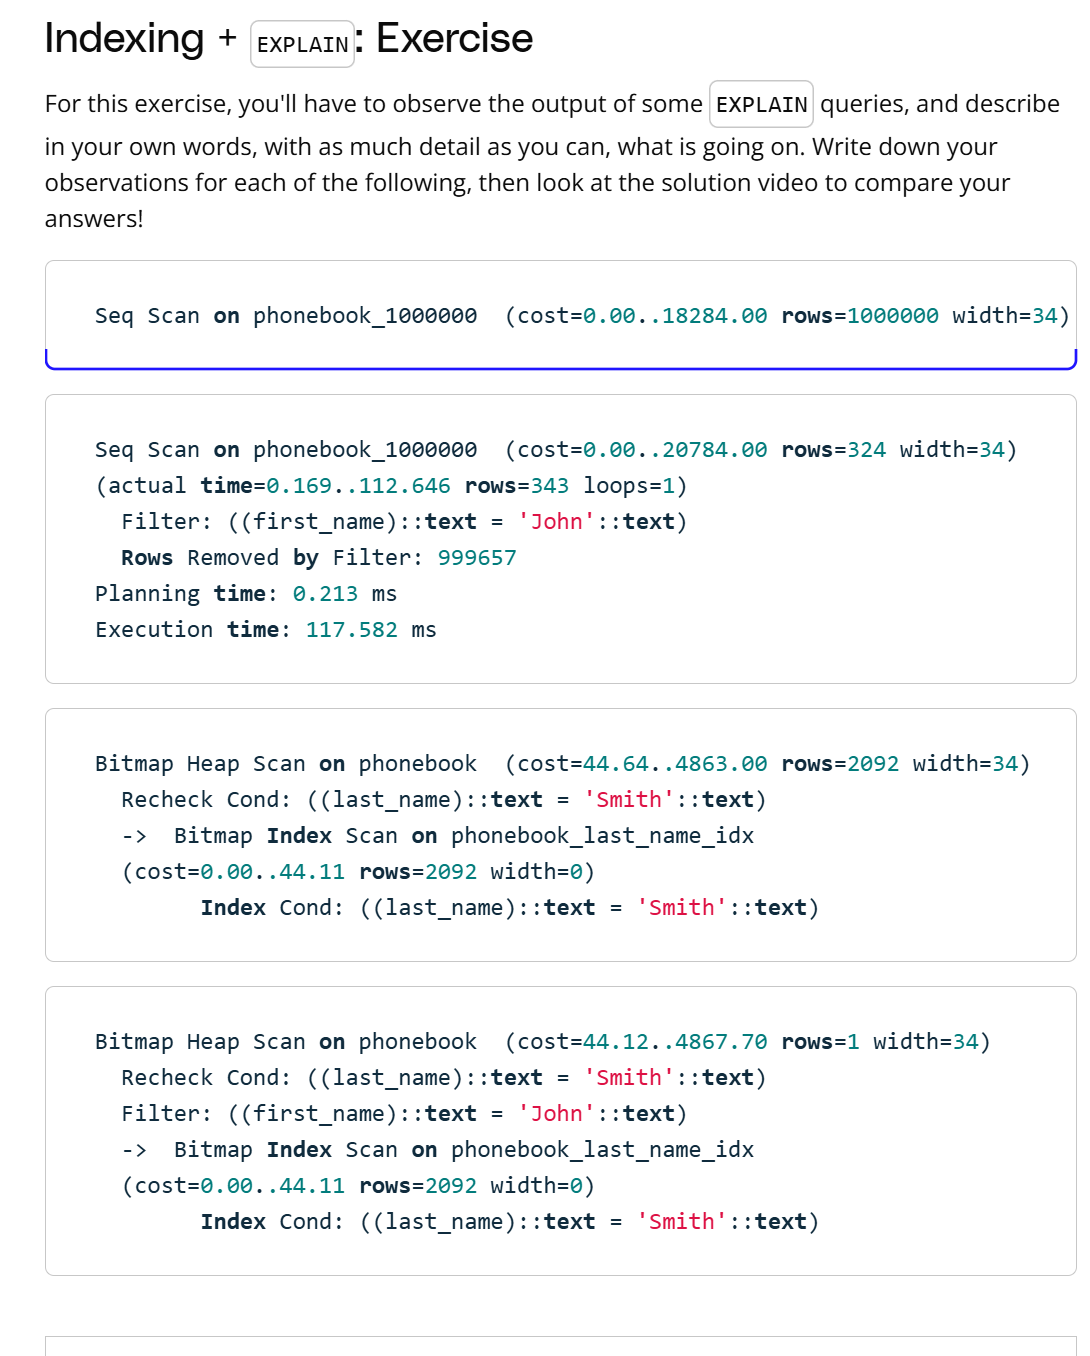

## Indexes + Explain: Solution

https://www.youtube.com/watch?v=MoooWjuWm0s

This output doesn't show any filter / condition. That was probably the result of a `SELECT ... FROM` without a filter, and the fastest way to do this is to simply scan the whole table and return every row.

https://www.youtube.com/watch?v=BqTV7bKqpsQ

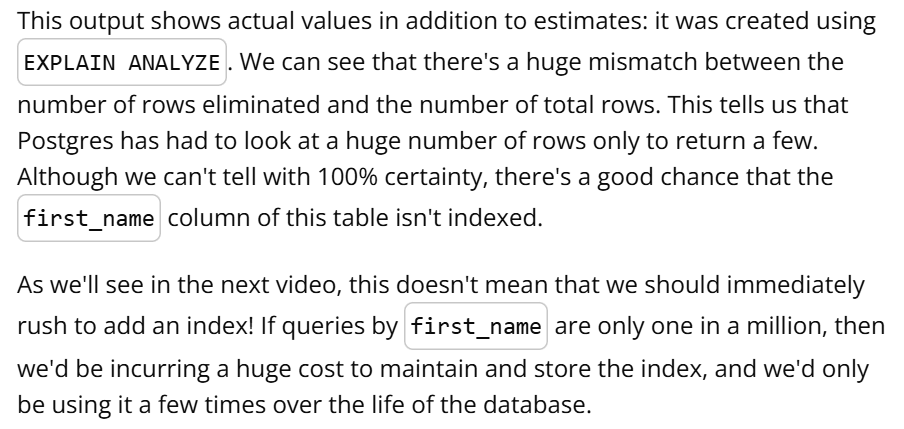

https://www.youtube.com/watch?v=7IUpW-a9Ozo

The tree structure tells us that this query plan contains two nodes that will happen sequentially. The fact that we see a bitmap index scan instead of a regular index scan can hint that this query is going to return more than "just a few rows" when compared to the total number of rows in that table. Otherwise, we might have expected Postgres to use an index scan. Note that these are my assumptions about the output, and since we're lacking a lot of information about the context of these outputs, you might not have drawn the same conclusions.

https://www.youtube.com/watch?v=LMr2zszQASY

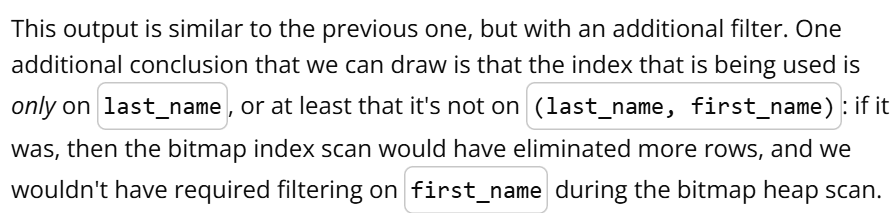

## Edge Case: Adding Too Many Indexes

How Many Indexes is Too Many?

https://www.youtube.com/watch?v=em2tOEMhl9Q

Just like the index that you may find at the end of a book uses more paper and ink, creating a new index in a database table requires additional disk space. Moreover, while the index at the end of a book is fixed once the book has been published, a database table is in constant change. Every time the data is manipulated, the index has to be changed during the same transaction, which will incur an additional processing and I/O cost. If the table is read-heavy, then this processing and I/O may not be as relevant.

https://www.youtube.com/watch?v=2KCUttbIXqo

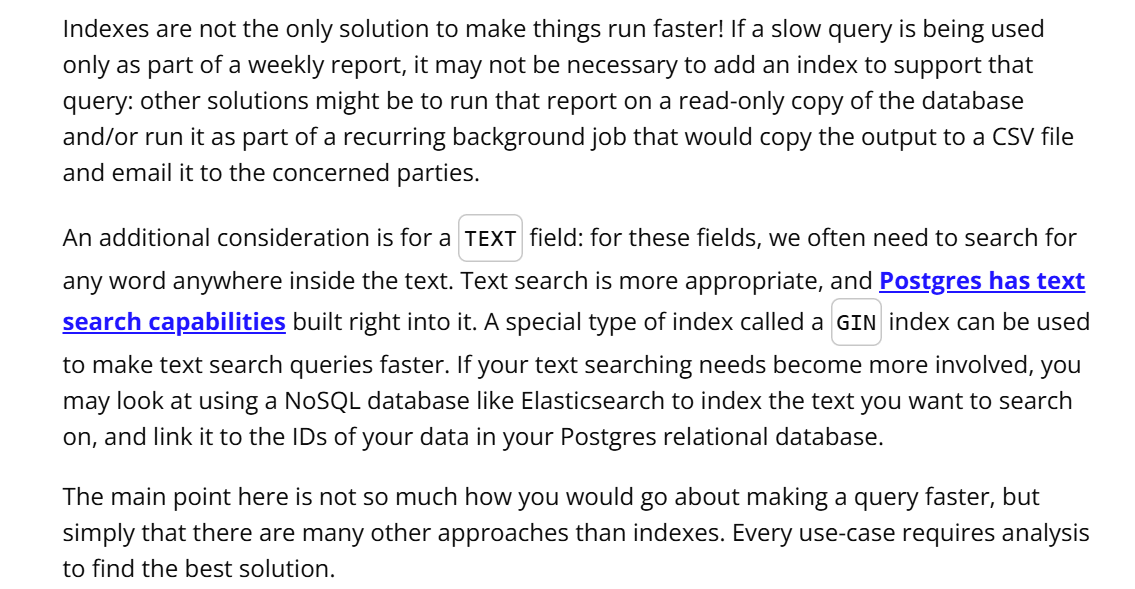

https://www.postgresql.org/docs/9.6/textsearch-intro.html

The index is a separate data structure that is stored on disk, requiring additional space on top of the table's data.

When doing an INSERT, UPDATE, or DELETE that affects data that is indexed, extra time will have to be spent updating those indexes before the DML query returns successfully.

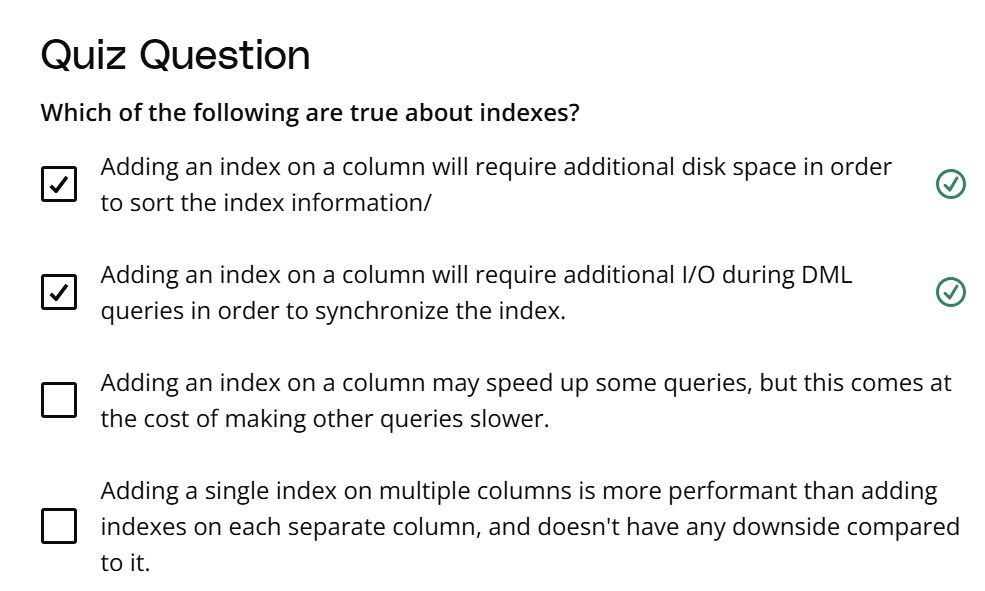

## Exercise: Creating a Complete Schema